# Purpose
研究婚外情的數據

(1) 該位外遇的可能性有多大？ 
(2) 影響外遇的原因是什麼？ 
(3) 可以根據分析結果說明如何降低外遇的發生嗎？

# 數據說明

* 婚外情數據即著名的“Fair’s Affairs”，取自於1969年《今日心理》（Psychology Today）所做的一個代表性調查
* 該數據從601個參與者身上收集了9個變量
* 變數包括一年來婚外情的頻率以及參與者性別、年齡、婚齡、是否有小孩、宗教信仰程度、學歷、職業，還有對婚姻的自我評分

#### affairs 受訪者在過去一年中進行外遇的頻率         
0 = 無         
1 = 一次       
2 = 兩次         
3 = 三倍         
7 = 4 - 10 次         
12 = 每月或更多         

#### gender          
0 = 女性         
1 = 男性         

#### age         
17.5 = 20 歲以下         
22.0 = 20 - 24         
27.0 = 25 - 29         
32.0 = 30 - 34         
37.0 = 35 - 39         
42.0 = 40 - 44         
47.0 = 45 - 49         
52.0 = 50 - 54         
57.0 = 55 或以上         

#### yearsmarried  婚姻時間                  
0.125 = 3 個月或更短         
0.417 = 4 - 6 個月         
0.750 = 6 個月 - 1 年         
1.500 = 1 - 2 年         
4.000 = 3 - 5 年         
7.000 = 6 - 8 年         
10.00 = 9 - 11 年         
15.00 = 12 年或更長時間         

#### children 孩子人數                  
0 = 無         
1 = 一個或多個         
         
#### religiousness 婚內的宗教信仰         
1 = 反宗教         
2 = 完全沒有         
3 = 輕微         
4 = 有點         
5 = 非常         

#### education 教育程度         
9.0 = 小學         
12.0 = 高中畢業         
14.0 = 一些大學         
16.0 = 大學畢業生         
17.0 = 一些畢業作品         
18.0 = 碩士學位         
20.0 = 博士、醫學博士或其他高級學位 

#### occupation 詳見data-descriptions.pdf

#### rating 對婚姻的自我評分 (5分制，1表示非常不幸福，5表示非常幸福）         

# <span style="color:#3498DB">1. import data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

In [2]:
df = pd.read_csv('Affairs.csv')
df.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


### <span style="color:#3498DB">Point: 請先將affairs變數轉為二值型因子'ynaffair'，外遇0次為0，外遇一次以上為1</span>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   affairs        601 non-null    int64  
 1   gender         601 non-null    object 
 2   age            601 non-null    float64
 3   yearsmarried   601 non-null    float64
 4   children       601 non-null    object 
 5   religiousness  601 non-null    int64  
 6   education      601 non-null    int64  
 7   occupation     601 non-null    int64  
 8   rating         601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


In [4]:
df.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating'],
      dtype='object')

In [5]:
df.head(50)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.000,no,3,18,7,4
1,0,female,27.0,4.000,no,4,14,6,4
2,0,female,32.0,15.000,yes,1,12,1,4
3,0,male,57.0,15.000,yes,5,18,6,5
4,0,male,22.0,0.750,no,2,17,6,3
5,0,female,32.0,1.500,no,2,17,5,5
6,0,female,22.0,0.750,no,2,12,1,3
7,0,male,57.0,15.000,yes,2,14,4,4
8,0,female,32.0,15.000,yes,4,16,1,2
9,0,male,22.0,1.500,no,4,14,4,5


In [65]:
#df['gender'] = df['gender'].astype('Int64')

# <span style="color:#3498DB">3.敘述性統計

### 3-1.有沒有外遇跟別性別 年齡 結婚幾年的關係

In [8]:
df_new_after_aff.groupby(["affairs","gender"], as_index=True).mean()[[ 'age', 'yearsmarried','children']]

age  yearsmarried  children
affairs gender                                   
0       1       34.382212      8.016231  0.725962
        2       30.296296      7.479947  0.641975
1       1       34.243590      9.256949  0.807692
        2       32.506944      9.829861  0.833333

### 3-2.外遇跟宗教和教育程度的關係
由下面可得知 有外遇的宗教信仰是完全沒有比較高

In [9]:
df_new_after_aff.groupby(["affairs"], as_index=True).mean()[['religiousness','education']]

,religiousness,education
affairs,,
0,3.203991,16.139690
1,2.853333,16.246667


# <span style="color:#3498DB">2.資料編碼前處理
  - loc
  - sklearn label_encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
#用loc做資料數值指定
df_new_after_aff = df.copy()
df_new_after_aff.loc[df_new_after_aff["affairs"] >=1, "affairs"] = 1
df_new_after_aff["gender"] = df_new_after_aff["gender"].map({"male":1,"female":2})

# 初始化 LabelEncoder
label_encoder = LabelEncoder()
df_new_after_aff["children"] = label_encoder.fit_transform(df_new_after_aff["children"])

#檢查是不是affairs真的是只有0，1
#print(df_new_after_aff.sort_values(by="affairs",ascending=False))


print(df_new_after_aff.head(50))

    affairs  gender   age  yearsmarried  children  religiousness  education  \
0         0       1  37.0        10.000         0              3         18   
1         0       2  27.0         4.000         0              4         14   
2         0       2  32.0        15.000         1              1         12   
3         0       1  57.0        15.000         1              5         18   
4         0       1  22.0         0.750         0              2         17   
5         0       2  32.0         1.500         0              2         17   
6         0       2  22.0         0.750         0              2         12   
7         0       1  57.0        15.000         1              2         14   
8         0       2  32.0        15.000         1              4         16   
9         0       1  22.0         1.500         0              4         14   
10        0       1  37.0        15.000         1              2         20   
11        0       1  27.0         4.000         1   

### 確認na值

In [7]:
df_new_after_aff.isnull().sum()
# 如果有na值 df.dropna(inplace = True)

affairs          0
gender           0
age              0
yearsmarried     0
children         0
religiousness    0
education        0
occupation       0
rating           0
dtype: int64

# <span style="color:#3498DB">4.Modeling
- 邏輯式回歸
- SVM
- desicion tree 決策樹  
- Random forest
- xgboosting

In [10]:
# =設定x與y (預測y和特徵x)
X = df_new_after_aff.drop(columns = ['affairs'])
y = df_new_after_aff['affairs'].values

# 標準化
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features


In [11]:
# 切分訓練集 預測集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 1.邏輯式回歸


In [12]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
result = model_log.fit(X_train, y_train)

In [13]:
from sklearn import metrics
y_test_pred_log = model_log.predict(X_test)

print (metrics.accuracy_score(y_test, y_test_pred_log))

0.8264462809917356


Text(0.5, 23.52222222222222, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

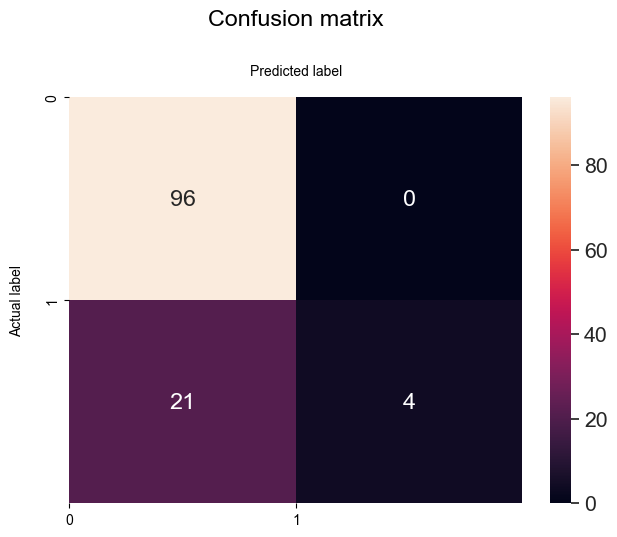

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns # For creating plots
from sklearn.metrics import confusion_matrix, accuracy_score 
import seaborn as sn
import numpy as np


# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_log) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [15]:
def get_acccuracy(cm1):
  total = 0
  total = cm1[0,0]+cm1[1,1]+cm1[1,0]+cm1[0,1]
  accurancy = (cm1[0,0] + cm1[1,1])/total
  print('accurancy',accurancy)
def get_precision(cm1):
  total = 0
  total = cm1[1,1]+cm1[0,1]
  precision = cm1[0,0]/total
  print('precision',precision)
def get_sensitivity(cm1):
  total = 0
  total = cm1[1,1]+cm1[1,0]
  sensitivity = cm1[1,1]/total
  print('sensitivity',sensitivity)
def get_precision(cm1):
  total = 0
  total = cm1[0,0]+cm1[0,1]
  precision = cm1[1,1]/total
  print("precision:",precision)

In [16]:
get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)

accurancy 0.8264462809917356
precision: 0.041666666666666664
sensitivity 0.16
precision: 0.041666666666666664


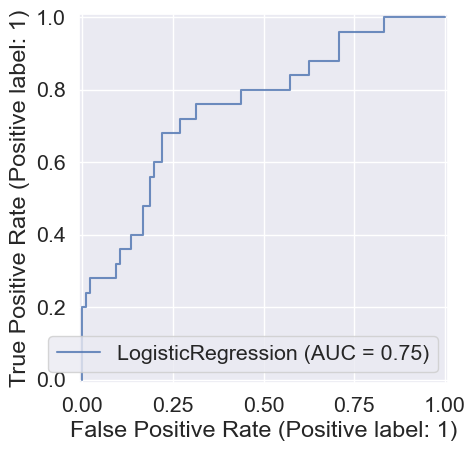

In [15]:
# roc曲線
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

Axes(0.125,0.11;0.775x0.77)


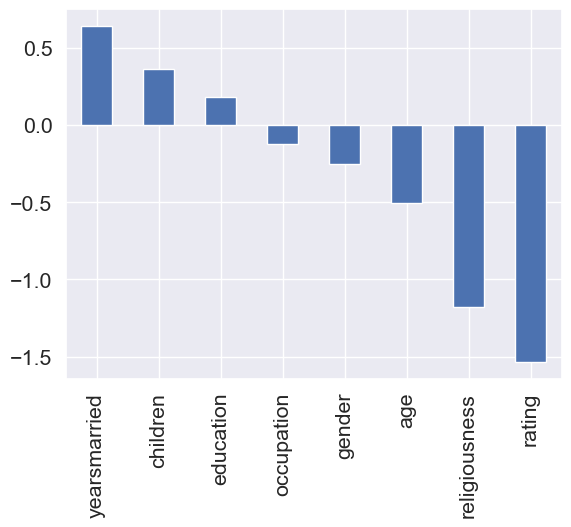

In [16]:
# 特徵的重要性評估
weights = pd.Series(model_log.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:15].plot(kind='bar'))

## 2.SVM

In [17]:
from sklearn.svm import SVC


# 支援向量機，選定核函數
model_svm = SVC(kernel='rbf') 
model_svm.fit(X_train,y_train)
y_test_pred_svm = model_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_svm)

0.7851239669421488

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

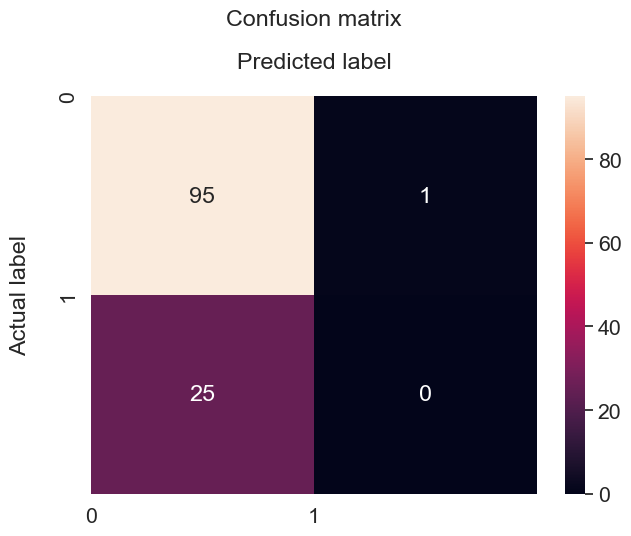

In [18]:
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_svm) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [19]:
#四個指標
get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)

accurancy 0.7851239669421488
precision: 0.0
sensitivity 0.0
precision: 0.0


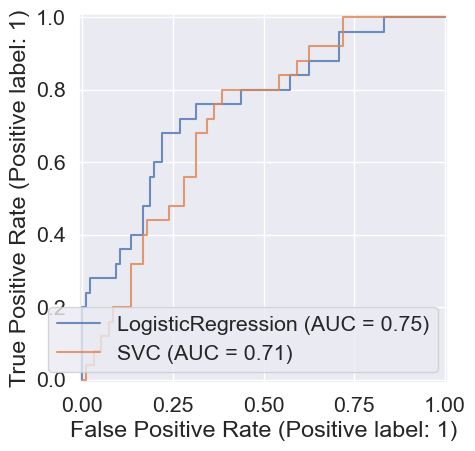

In [19]:
# 兩個模型做 ROC
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
svm_disp = RocCurveDisplay.from_estimator(model_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

對特徵做調整，網格搜索找超參數  
再做一次 SVM 跟logistic相比

In [20]:

#使用 standardScaler 做變數篩選再做一次 svm
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler


preprocessor = make_pipeline(SelectKBest(f_classif, k=5))  # 僅保留好的K個變數
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))

In [21]:
SVM.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'standardscaler', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [22]:
#設定超參數的範圍    gamma值越大 核函數營響範圍越小(欠擬和)   政則化逞罰度-c值越大 越正則化，模型越簡單
hyper_params_svm = {'svc__gamma':[0.001, 0.0001, 0.0005], 'svc__C':[1, 0.1, 0.001, 1000, 3000],}

In [23]:
# GridSearchCV:網格搜索, cv:交叉驗證 尋找最佳超參數
from sklearn.model_selection import GridSearchCV

grid_svm = GridSearchCV(SVM, hyper_params_svm,scoring='recall', cv=3) 
grid_svm.fit(X_train, y_train)

print(grid_svm.best_params_)

{'svc__C': 1, 'svc__gamma': 0.001}


In [24]:
y_test_pred_gridsvm = grid_svm.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_gridsvm)

0.7933884297520661

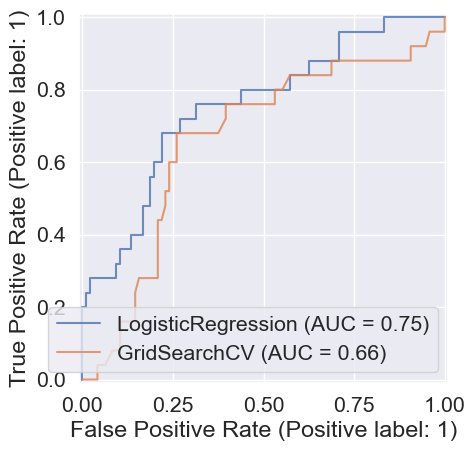

In [25]:
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_svm_disp = RocCurveDisplay.from_estimator(grid_svm, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

## 3.Decision tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion = 'gini')  # CART, 默認為gini
clf = model_dt.fit(X_train, y_train)

# Make predictions
y_test_pred_dt = model_dt.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_test_pred_dt)}')

Accuracy: 0.6694214876033058


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

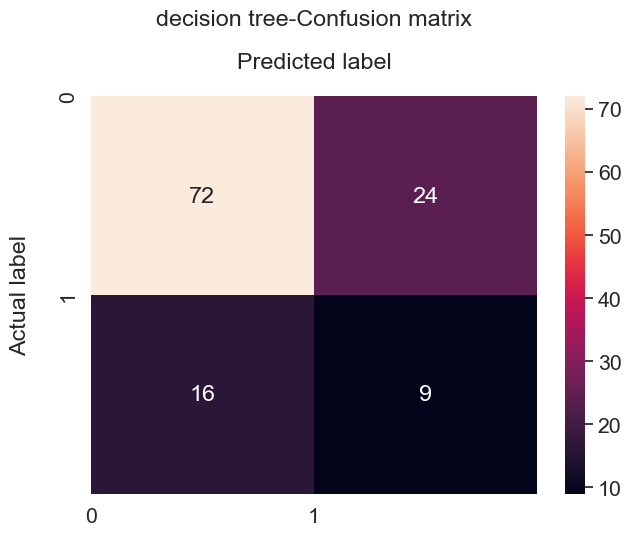

In [21]:
#模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_dt) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('decision tree-Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


### Decision Tree Optimization - Pruning(剪枝)
設定desicion tree 超參數

In [22]:
#使用 standardScaler 做變數篩選再做一次 decision tree
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif


preprocessor = make_pipeline(SelectKBest(f_classif, k=8)) # 挑選出K個分數最高的特徵
DecisionTree = make_pipeline(preprocessor,DecisionTreeClassifier(random_state=0))

In [23]:
# desicion tree 的超參數
DecisionTree.get_params().keys()


dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'decisiontreeclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__monotonic_cst', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [24]:
# 設定超參數 dict list
hyper_params_dt = {
    'decisiontreeclassifier__max_leaf_nodes':[10,20,30],    # 最多有多少個leaf nodes
    'decisiontreeclassifier__min_samples_leaf': [5,10,15],  # 要成為leaf nodes，最少需要多少資料
    'decisiontreeclassifier__max_depth': [5,10,15]          # 限制樹的高度最多幾層
}

In [25]:
# 用網格搜索找最佳 超參數
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(DecisionTree, hyper_params_dt, scoring='recall', cv=3)
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__max_leaf_nodes': 30, 'decisiontreeclassifier__min_samples_leaf': 5}


In [26]:
y_test_pred_griddt = grid_dt.predict(X_test)
print(f'經過剪枝(設定超參數)後的Accuracy: {metrics.accuracy_score(y_test, y_test_pred_griddt)}')

經過剪枝(設定超參數)後的Accuracy: 0.7768595041322314


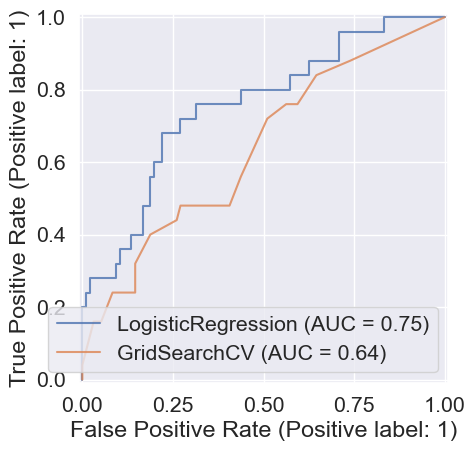

In [32]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
grid_dt_disp = RocCurveDisplay.from_estimator(grid_dt, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

### 決策樹(visualization)

In [33]:
from sklearn import tree
print(tree.export_text(model_dt))

|--- feature_7 <= 0.38
|   |--- feature_1 <= 0.81
|   |   |--- feature_1 <= 0.30
|   |   |   |--- feature_5 <= 0.68
|   |   |   |   |--- feature_4 <= 0.62
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  0.62
|   |   |   |   |   |--- feature_6 <= 0.17
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_6 >  0.17
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  0.68
|   |   |   |   |--- feature_5 <= 0.91
|   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |--- feature_1 <= 0.18
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.18
|   |   |   |   |   |   |   |--- feature_4 <= 0.12
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_4 >  0.12
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  0.91
|   |   |   |   |   |--- class: 0
|   |   |

## 4.Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
y_test_pred_rf = model_rf.predict(X_test)
print(f'Accuracy: {metrics.accuracy_score(y_test, y_test_pred_rf)}')

Accuracy: 0.7355371900826446


Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

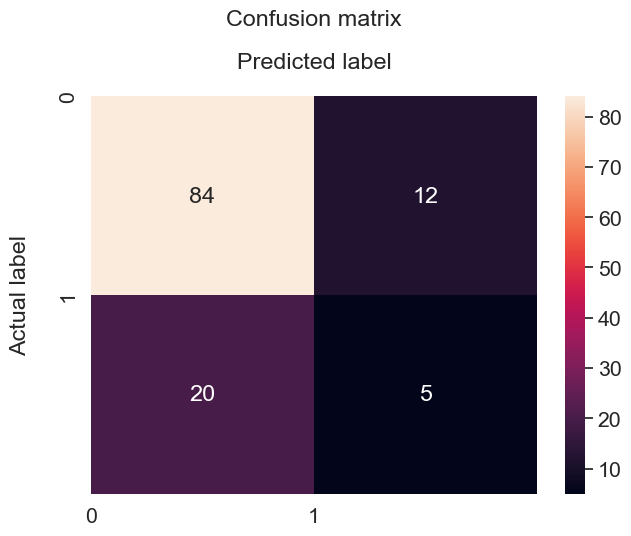

In [28]:
# 模糊矩陣
cm = confusion_matrix(y_test, y_test_pred_rf) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [29]:
#算四個指標
get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)

accurancy 0.7355371900826446
precision: 0.052083333333333336
sensitivity 0.2
precision: 0.052083333333333336


### Random forest 對變數做重要性排列 
### 外不外遇的因素

<Axes: >

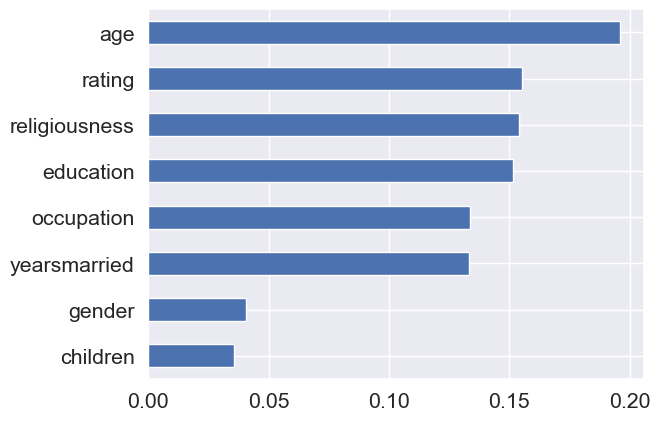

In [31]:
#特徵(變數)重要性排列
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

## 5.Xgboost

In [30]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_test_pred_xg = model_xg.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred_xg)

0.743801652892562

Text(0.5, 15.049999999999999, 'Predicted label\n')

<Figure size 2800x2000 with 0 Axes>

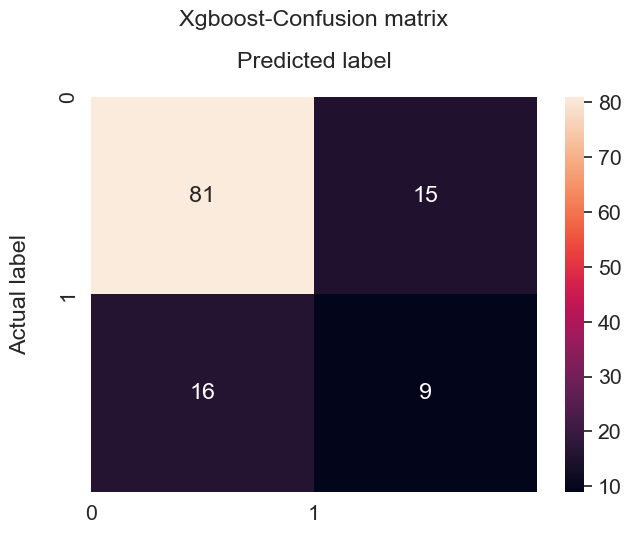

In [31]:
# Create the Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_xg) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))

fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')

class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Xgboost-Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

In [32]:
#計算四大指標
get_acccuracy(cm)
get_precision(cm)
get_sensitivity(cm)
get_precision(cm)

accurancy 0.743801652892562
precision: 0.09375
sensitivity 0.36
precision: 0.09375


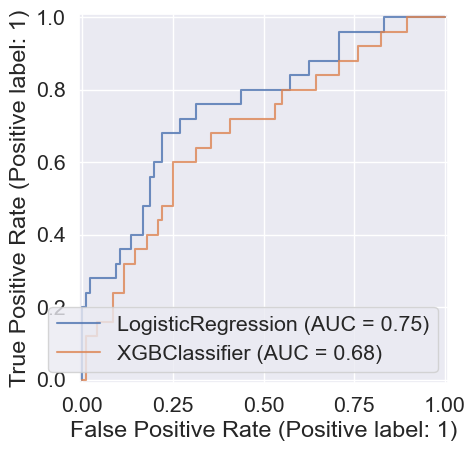

In [39]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
log_disp = RocCurveDisplay.from_estimator(model_log, X_test, y_test, ax=ax, alpha=0.8)
model_xg_disp = RocCurveDisplay.from_estimator(model_xg, X_test, y_test, ax=ax, alpha=0.8)
plt.show()